Análise Comparativa de Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, ShuffleSplit, KFold, cross_validate
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

1. Obtenção de dados

In [2]:
df = pd.read_csv('../data/raw/Churn_Modelling.csv')
df_dict = pd.read_csv("../data/external/dictionary.csv")
df_dict

,variavel,descricao,tipo,subtipo
0,RowNumber,O número sequencial atribuído a cada linha,Inutil,NaN
1,CustomerId,Identificador único do cliente,Quantitativa,Discreta
2,Surname,Sobrenome do Cliente,Inutil,NaN
3,CreditScore,Pontuação de crédito do cliente,Quantitativa,Discreta
4,Geography,Localização geográfica do cliente,Qualitativa,Nominal
5,Gender,Genero do Cliente,Qualitativa,Nominal
6,Age,Idade do Cliente,Quantitativa,Discreta
7,Tenure,O número de anos que o cliente está no banco,Quantitiva,Discreta
8,Balance,Saldo da conta do cliente,Quantitativa,Continua
9,NumOfProducts,Número de produtos bancários que o cliente possui,Quantitativa,Discreta


In [6]:
df_dict = pd.DataFrame([
   {
        'variavel': 'RowNumber',
        'descricao': 'O número sequencial atribuído a cada linha',
        'tipo': 'Inútil',
        'subtipo': 'Inútil',
    },
    {
        'variavel': 'CustomerId',
        'descricao': 'Identificador único do cliente',
        'tipo': 'Inútil',
        'subtipo': 'Inútil',
    },
    {
        'variavel': 'Surname',
        'descricao': 'Sobrenome do Cliente',
        'tipo': 'Inútil',
        'subtipo': 'Inútil',
    },
    {
        'variavel': 'CreditScore',
        'descricao': 'Pontuação de crédito do cliente',
        'tipo': 'Quantitativa',
        'subtipo': 'Discreta',
    },
    {
        'variavel': 'Geography',
        'descricao': 'Localização geográfica do cliente',
        'tipo': 'Qualitativa',
        'subtipo': 'Nominal',
    },
    {
        'variavel': 'Gender',
        'descricao': 'Genero do Cliente',
        'tipo': 'Qualitativa',
        'subtipo': 'Nominal',
    },
    {
        'variavel': 'Age',
        'descricao': 'Idade do Cliente',
        'tipo': 'Quantitativa',
        'subtipo': 'Discreta',
    },
    {
        'variavel': 'Tenure',
        'descricao': 'O número de anos que o cliente está no banco',
        'tipo': 'Quantitiva',
        'subtipo': 'Discreta',
    },
    {
        'variavel': 'Balance',
        'descricao': 'Saldo da conta do cliente',
        'tipo': 'Quantitativa',
        'subtipo': 'Continua',
    },
    {
        'variavel': 'NumOfProducts',
        'descricao': 'Número de produtos bancários que o cliente possui',
        'tipo': 'Quantitativa',
        'subtipo': 'Discreta',
    },
    {
        'variavel': 'HasCrCard',
        'descricao': 'Indica se o cliente possui cartão de crédito  (binário: sim/não).',
        'tipo': 'Qualitativa',
        'subtipo': 'Nominal',
    },
    {
        'variavel': 'IsActiveMember',
        'descricao': ' Indica se o cliente é um membro ativo (binário: sim/não).',
        'tipo': 'Qualitativa',
        'subtipo': 'Nominal',
    },
    {
        'variavel': 'EstimatedSalary',
        'descricao': 'O salario estimado do cliente.',
        'tipo': 'Quantitativa',
        'subtipo': 'Continua',
    },
    {
        'variavel': 'Exited',
        'descricao': 'Variavel target, indica se o cliente saiu do banco (binário: sim/não).',
        'tipo': 'Qualitativa',
        'subtipo': 'Nominal',
    },



])

2. Tratamento de dados faltantes

In [3]:
print(f'A quantidades de dado null é: {df.isnull().sum().sum()}')
print(f'A quantidades de dado NAN é: {df.isna().sum().sum()}')

A quantidades de dado null é: 0
A quantidades de dado NAN é: 0


3. Normalização de Dados

In [8]:
target_variable = 'Exited'
useless_variables =  (
    df_dict
    .query("tipo == 'Inútil'")
    .variavel
    .to_list()
)

nominal_variables = (
    df_dict
    .query("subtipo == 'Nominal' and variavel != @target_variable")
    .variavel
    .to_list()
)

continuous_variables = (
    df_dict
    .query("subtipo == 'Continua' and variavel != @target_variable")
    .variavel
    .to_list()
)
discrete_variables = (
    df_dict
    .query("subtipo == 'Discreta' and variavel != @target_variable")
    .variavel
    .to_list()
)


In [23]:
list(df.columns)

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

## Normalização de Dados

In [9]:
nominal_preprocessor = Pipeline(steps=[
    ("encoding", OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist')),
])

continuous_preprocessor = Pipeline(steps=[
    ("normalization", StandardScaler()),
])

discrete_preprocessor = Pipeline(steps=[
    ("normalization", StandardScaler()),
])

In [10]:
preprocessor = ColumnTransformer(transformers=[
    ("nominal", nominal_preprocessor, nominal_variables),
    ("continuous", continuous_preprocessor, continuous_variables),
    ("discrete", discrete_preprocessor, discrete_variables),
])

In [11]:
preprocessor

ColumnTransformer(transformers=[('nominal',
                                 Pipeline(steps=[('encoding',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                sparse_output=False))]),
                                 ['Geography', 'Gender', 'HasCrCard',
                                  'IsActiveMember']),
                                ('continuous',
                                 Pipeline(steps=[('normalization',
                                                  StandardScaler())]),
                                 ['Balance', 'EstimatedSalary']),
                                ('discrete',
                                 Pipeline(steps=[('normalization',
                                                  StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure',
                                  'NumOfProducts'])])

## Modelos

In [12]:
X = df.drop(columns=[target_variable] + useless_variables)
y = df[target_variable]

In [13]:
models = [DummyRegressor(strategy='mean'), LinearRegression(), KNeighborsRegressor(n_neighbors=5), SVR()]
metrics = [
    'neg_mean_absolute_error',
    'neg_mean_squared_error',
    'neg_mean_absolute_percentage_error',
    'r2',
]
monte_carlo = ShuffleSplit(n_splits=10, test_size=.3, random_state=42)
# hold_out = ShuffleSplit(n_splits=1, test_size=.3, random_state=42)
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [14]:
results_total = None
for model in models:
    model_name = model.__class__.__name__
    print(f"rodando para o modelo: {model_name}")
    approach = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model),
    ])

    scores = cross_validate(
        approach, X, y,
        scoring=metrics,
        cv=monte_carlo
    )
    results_model = pd.DataFrame(scores)
    results_model['model'] = model_name
    if results_total is None:
        results_total = results_model
    else:
        results_total = pd.concat([results_total, results_model])

rodando para o modelo: DummyRegressor
rodando para o modelo: LinearRegression
rodando para o modelo: KNeighborsRegressor
rodando para o modelo: SVR


In [15]:
results_total.groupby('model').agg(['mean', 'std']).T

model                                         DummyRegressor  \
fit_time                                mean    2.987032e-02   
                                        std     2.178425e-02   
score_time                              mean    1.397204e-02   
                                        std     6.134516e-03   
test_neg_mean_absolute_error            mean   -3.245405e-01   
                                        std     1.973255e-03   
test_neg_mean_squared_error             mean   -1.624160e-01   
                                        std     3.453015e-03   
test_neg_mean_absolute_percentage_error mean   -7.298351e+14   
                                        std     1.430108e+13   
test_r2                                 mean   -3.857036e-04   
                                        std     4.632997e-04   

model                                         KNeighborsRegressor  \
fit_time                                mean         6.900671e-02   
                                        std          3.603369e-02   
score_time                              mean         4.088148e-01   
                                        std          8.604613e-02   
test_neg_mean_absolute_error            mean        -2.150800e-01   
                                        std          3.494730e-03   
test_neg_mean_squared_error             mean        -1.281573e-01   
                                        std          3.070450e-03   
test_neg_mean_absolute_percentage_error mean        -4.449256e+14   
                                        std          1.764501e+13   
test_r2                                 mean         2.105402e-01   
                                        std          1.515345e-02   

model                                         LinearRegression           SVR  
fit_time                                mean      2.668884e-02  2.476133e+00  
                                        std       1.070273e-02  4.719271e-01  
score_time                              mean      1.114042e-02  1.448347e+00  
                                        std       2.813571e-03  5.696040e-01  
test_neg_mean_absolute_error            mean     -2.857676e-01 -1.948924e-01  
                                        std       2.445058e-03  3.946902e-03  
test_neg_mean_squared_error             mean     -1.388142e-01 -1.123972e-01  
                                        std       3.216352e-03  4.141396e-03  
test_neg_mean_absolute_percentage_error mean     -6.649152e+14 -3.489926e+14  
                                        std       1.143386e+13  8.228097e+12  
test_r2                                 mean      1.449786e-01  3.078200e-01  
                                        std       8.836426e-03  1.579377e-02

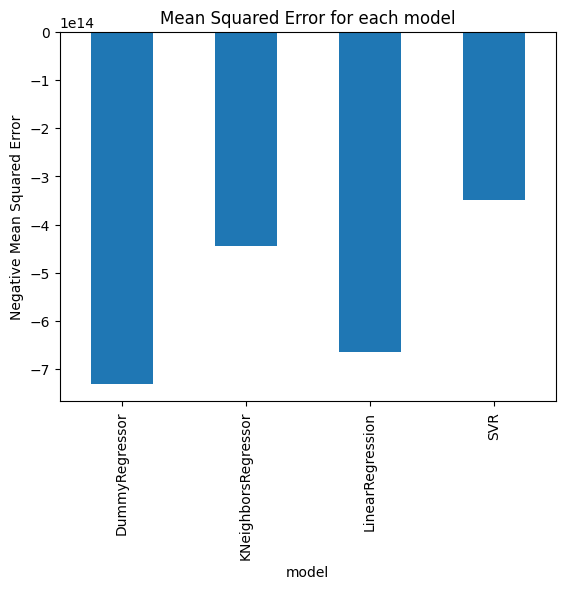

In [16]:
results_total.groupby('model')['test_neg_mean_absolute_percentage_error'].mean().plot(kind='bar')
plt.title('Mean Squared Error for each model')
plt.ylabel('Negative Mean Squared Error')
plt.show()

## Comparação entre os modelos

Para nosso problema o mais importante é minimizar os falsos positivos, os clientes que foram falsamente preditos como se tivessem saido do banco, logo a metrica precision será importante. Os falsos negativos também tem uma importancia já que se muitos clientes forem preditos como "não sairam" mas era o contrario, isso também será ruim para o banco, então também olharemos secundariamente para para a métrica accuracy.

In [17]:
confusion_matrices = {}
classification_reports = {}

for model in models:
    model_name = model.__class__.__name__
    print(f"rodando para o modelo: {model_name}")
    approach = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model),
    ])

    y_true_total = []
    y_pred_total = []

    # Validação cruzada Monte Carlo
    for train_idx, test_idx in monte_carlo.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Treina e testa o modelo
        approach.fit(X_train, y_train)
        y_pred = approach.predict(X_test)

        # Converte probabilidades em classes (se necessário)
        if y_pred.dtype == float or len(set(y_pred)) > 2:
            y_pred = (y_pred > 0.5).astype(int)

        # Acumula os rótulos verdadeiros e predições
        y_true_total.extend(y_test)
        y_pred_total.extend(y_pred)

    # Calcula a matriz de confusão
    cm = confusion_matrix(y_true_total, y_pred_total)
    confusion_matrices[model_name] = cm

    # Calcula o relatório de classificação
    classification_reports[model_name] = classification_report(y_true_total, y_pred_total)

# Exibe os relatórios
for model_name, report in classification_reports.items():
    print(f"Relatório de Classificação - {model_name}")
    print(report)
    print("-" * 50)

rodando para o modelo: DummyRegressor


c:\Users\myle_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\myle_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\myle_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

rodando para o modelo: LinearRegression
rodando para o modelo: KNeighborsRegressor
rodando para o modelo: SVR
Relatório de Classificação - DummyRegressor
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     23880
           1       0.00      0.00      0.00      6120

    accuracy                           0.80     30000
   macro avg       0.40      0.50      0.44     30000
weighted avg       0.63      0.80      0.71     30000

--------------------------------------------------
Relatório de Classificação - LinearRegression
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     23880
           1       0.66      0.13      0.21      6120

    accuracy                           0.81     30000
   macro avg       0.73      0.55      0.55     30000
weighted avg       0.78      0.81      0.75     30000

--------------------------------------------------
Relatório de Classificação - KNeighborsRegre

In [18]:
y_pred

array([0, 1, 0, ..., 0, 0, 1])

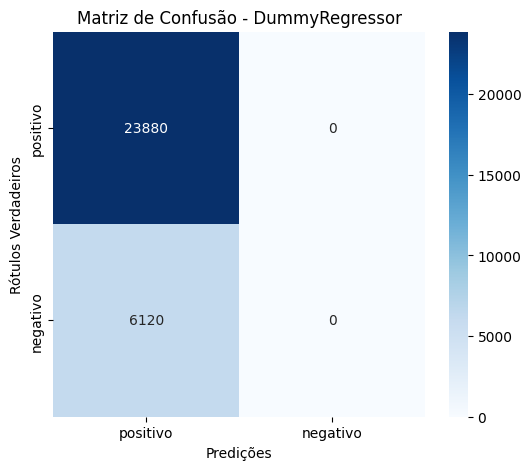

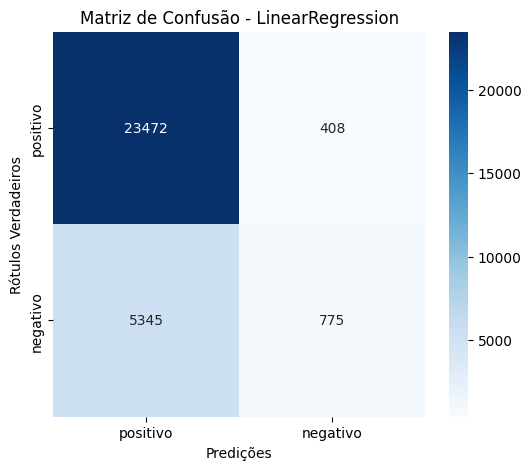

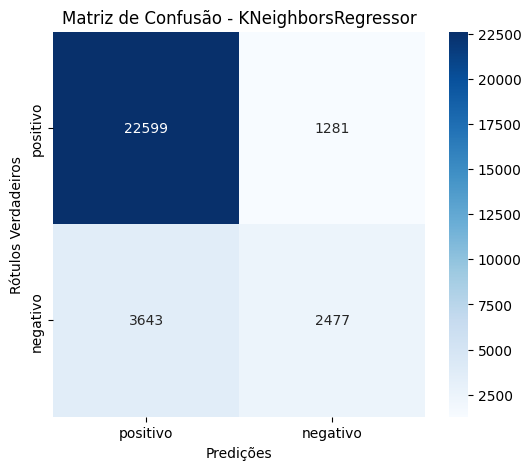

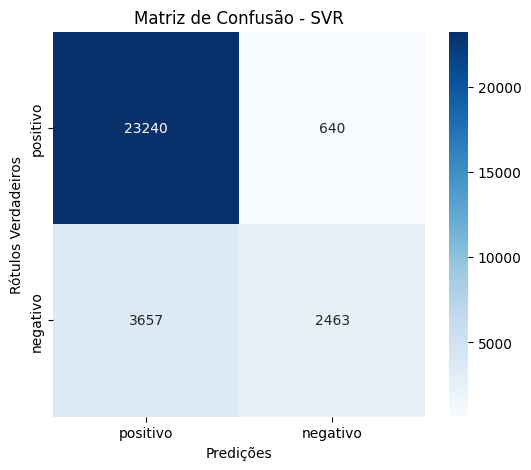

In [19]:
for model_name, cm in confusion_matrices.items():
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positivo', 'negativo'], yticklabels=['positivo', 'negativo'])
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.xlabel('Predições')
    plt.ylabel('Rótulos Verdadeiros')
    plt.show()

## Otimisação de hiperparametros dos modelos

# KNN

In [22]:
score = []
for i in range(3, 20):
  model_pipeline = Pipeline(steps=[
      ("preprocessor", preprocessor),
      ("knn", KNeighborsRegressor(n_neighbors=i))
  ])

  # Dividindo os dados em treino e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Ajustando o pipeline nos dados de treino
  model_pipeline.fit(X_train, y_train)

  # Avaliação
  score.append(model_pipeline.score(X_test, y_test))


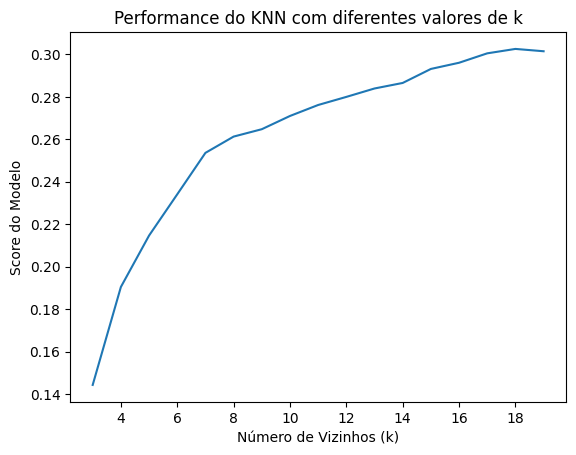

In [24]:
plt.plot(range(3, 20), score)
plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("Score do Modelo")
plt.title("Performance do KNN com diferentes valores de k")
plt.show()

# SVR

In [25]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

In [26]:
score = []
for i in kernels:
  model_pipeline = Pipeline(steps=[
      ("preprocessor", preprocessor),
      ("SVR", SVR(kernel = i))
  ])

  # Dividindo os dados em treino e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Ajustando o pipeline nos dados de treino
  model_pipeline.fit(X_train, y_train)

  # Avaliação
  score.append( model_pipeline.score(X_test, y_test))

In [27]:
score

[-0.0569559331495757,
 0.28173485968970324,
 0.3319474333300616,
 -5730.38914860179]

O melhor foi o kernel = 'rbf'

agora com o rbf, vamos testar a metrica degree

In [28]:
score2 = []

for i in range(10,100,10):
  model_pipeline = Pipeline(steps=[
      ("preprocessor", preprocessor),
      ("SVR", SVR(kernel = 'rbf', degree = i))
  ])
  #print(i)
  # Dividindo os dados em treino e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Ajustando o pipeline nos dados de treino
  model_pipeline.fit(X_train, y_train)

  # Avaliação
  score2.append( model_pipeline.score(X_test, y_test))

In [30]:
score2

[0.10835276331074462,
 0.20953311200643743,
 0.2524281402661094,
 0.2824493787060355,
 0.3255138190341713,
 0.33827464251088923,
 0.3157474744514538,
 0.2780383958771382,
 0.24014965331049365,
 0.1640022360120389,
 0.07385401442784523,
 0.03463370950121991,
 -0.007280910606119795,
 -0.09474872535043866,
 -0.13253024489726362,
 -0.17281136155915866,
 -0.20134015883167566,
 -0.21793477534839822,
 -0.2388227053867229]

Esse hiperparametro não parece ter efeito no nosso caso

In [29]:
from sklearn.tree import DecisionTreeRegressor

# Lista para armazenar os scores
score2 = []

# Iterando sobre diferentes profundidades máximas para a árvore
for i in range(1, 20):  # Valores de profundidade máxima de 1 a 10
    model_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("DecisionTree", DecisionTreeRegressor(max_depth=i, random_state=42))
    ])
    #print(f"Max Depth: {i}")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model_pipeline.fit(X_train, y_train)

    score2.append(model_pipeline.score(X_test, y_test))